#**Install Libraries**

In [56]:
!pip install libpysal
!pip install rasterio
!pip install rioxarray
!pip install geopandas rpy2
!pip install splot
!pip install mapclassify --upgrade
!pip install esda

#**Import Libraries**

In [57]:
# Load the required Python libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import libpysal as ps
import rasterio as rio
import rioxarray as rxr
import seaborn as sns
import matplotlib.pyplot as plt

# Set options for decimal numbers and avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.4f' % x)

#**Load Non Spasial Dataset**

In [58]:
# Membaca file CSV
Census_Data = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Autokorelasi/practicaldata.csv"
df = pd.read_csv(Census_Data)
df.head(5)

,OA,White_British,Low_Occupancy,Unemployed,Qualification
0,E00004120,42.3567,6.2937,1.8939,73.6264
1,E00004121,47.2000,5.9322,2.6882,69.9029
2,E00004122,40.6780,2.9126,1.2121,67.5824
3,E00004123,49.6622,0.9259,2.8037,60.7759
4,E00004124,51.1364,2.0000,3.8168,65.9864


#**Load Spatial Dataset**

In [59]:
import geopandas as gpd
Output_Areas = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Autokorelasi/Camden.shp"

In [60]:
# Membaca file SHP dan menyimpannya sebagai GeoDataFrame
Output_Areass = gpd.read_file(Output_Areas)

#**Read Spatial Dataset**

In [61]:
import geopandas as gpd
import pandas as pd
from tabulate import tabulate

# Membaca file SHP dan menyimpannya sebagai GeoDataFrame
Output_Areas = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Autokorelasi/Camden.shp"
Output_Areass = gpd.read_file(Output_Areas)

# Mengurangi Output: Menampilkan informasi tentang data geospatial dengan membatasi jumlah kolom yang ditampilkan
info_str = Output_Areass.info(max_cols=10)

# Menyimpan Output ke File (opsional): Menyimpan informasi ke dalam file teks
with open("output.txt", "w") as text_file:
    text_file.write(str(info_str))  # Mengkonversi ke string dan kemudian menyimpan

# Tampilan Tabel yang Bagus: Membuat tabel yang bagus dengan tabulate
df = pd.DataFrame(Output_Areass)
table = tabulate(df, headers='keys', tablefmt='pretty', showindex=False)

# Menampilkan tabel
print("\nTabel Data:")
print(table)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OA11CD    749 non-null    object  
 1   geometry  749 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 11.8+ KB


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#**Merge Dataset - Spatial & Non Spatial Dataset**

In [62]:
# Membaca GeoDataFrame dari file SHP
Output_Areass = gpd.read_file(Output_Areas)

# Membaca DataFrame dari file CSV
Census_Data = pd.read_csv(Census_Data)

# Pastikan kedua DataFrame telah dibaca dengan benar

# Menggabungkan kedua DataFrame berdasarkan kolom "OA11CD" dan "OA"
merged_data = Output_Areass.merge(Census_Data, left_on="OA11CD", right_on="OA")

# Hasil penggabungan tersimpan dalam variabel merged_data


In [63]:
merged_data.head(10)

,OA11CD,geometry,OA,White_British,Low_Occupancy,Unemployed,Qualification
0,E00004527,"POLYGON ((530648.449 181230.247, 530648.042 18...",E00004527,48.2906,12.7451,7.5117,35.8079
1,E00004525,"POLYGON ((530511.315 181531.164, 530511.338 18...",E00004525,40.9449,16.8067,5.9908,42.4107
2,E00004522,"POLYGON ((530207.000 181434.000, 530209.560 18...",E00004522,44.1624,8.5470,2.1164,56.4767
3,E00004287,"POLYGON ((524355.399 185053.615, 524346.813 18...",E00004287,31.8681,12.6126,3.2864,67.8571
4,E00004206,"POLYGON ((528718.483 184565.050, 528721.071 18...",E00004206,56.4516,19.6850,7.9832,31.7460
5,E00004200,"POLYGON ((529332.435 181816.596, 529336.905 18...",E00004200,39.9194,11.7647,3.5242,57.2034
6,E00004281,"POLYGON ((529826.000 184537.000, 529825.354 18...",E00004281,61.7530,7.8261,4.7619,64.5455
7,E00004464,"POLYGON ((528360.597 184593.529, 528350.446 18...",E00004464,56.3636,8.9888,1.9608,16.3636
8,E00004460,"POLYGON ((527934.000 184846.854, 527936.176 18...",E00004460,41.3636,19.0000,6.4286,29.7468
9,E00004461,"POLYGON ((528045.880 184601.444, 528041.000 18...",E00004461,31.7010,31.2977,10.1124,27.5000


In [64]:
# Mengonversi GeoDataFrame OA.Census menjadi GeoDataFrame OA.Census_sf
OA_Census_sf = gpd.GeoDataFrame(merged_data)

In [65]:
OA_Census_sf

,OA11CD,geometry,OA,White_British,Low_Occupancy,Unemployed,Qualification
0,E00004527,"POLYGON ((530648.449 181230.247, 530648.042 18...",E00004527,48.2906,12.7451,7.5117,35.8079
1,E00004525,"POLYGON ((530511.315 181531.164, 530511.338 18...",E00004525,40.9449,16.8067,5.9908,42.4107
2,E00004522,"POLYGON ((530207.000 181434.000, 530209.560 18...",E00004522,44.1624,8.5470,2.1164,56.4767
3,E00004287,"POLYGON ((524355.399 185053.615, 524346.813 18...",E00004287,31.8681,12.6126,3.2864,67.8571
4,E00004206,"POLYGON ((528718.483 184565.050, 528721.071 18...",E00004206,56.4516,19.6850,7.9832,31.7460
...,...,...,...,...,...,...,...
744,E00004362,"POLYGON ((528260.884 185484.560, 528262.000 18...",E00004362,44.9405,17.3228,7.4380,27.0588
745,E00004360,"POLYGON ((525621.944 185627.277, 525668.717 18...",E00004360,38.9091,5.0847,2.8986,68.3036
746,E00004361,"POLYGON ((526368.056 185655.125, 526369.000 18...",E00004361,59.3496,5.0505,3.1153,46.2428
747,E00004368,"POLYGON ((527538.000 185299.000, 527539.000 18...",E00004368,45.0276,8.5714,2.8571,71.9064


#**Spatial distribution**

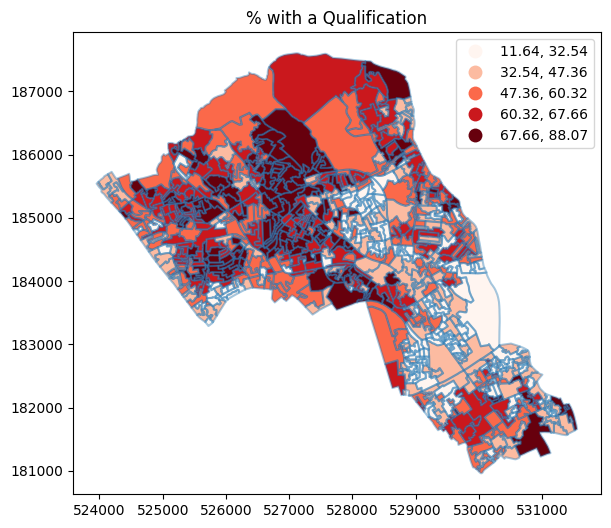

In [66]:
# Menentukan warna dan skema pengisian
cmap = "Reds"  # Palet warna
column = "Qualification"  # Kolom untuk pengisian
scheme = "quantiles"  # Skema pengisian (quantiles)

# Membuat peta menggunakan matplotlib
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
OA_Census_sf.plot(column=column, cmap=cmap, scheme=scheme, legend=True, ax=ax)

# Menambahkan batas dengan alpha
OA_Census_sf.boundary.plot(ax=ax, alpha=0.4)

# Menambahkan judul
plt.title("% with a Qualification")

# Menampilkan peta
plt.show()

#**Find queen neighbours**

In [67]:
import geopandas as gpd
from libpysal.weights import Queen
import pandas as pd
from tabulate import tabulate

# Membuat daftar tetangga (neighbors) dengan skema Queen
wq = Queen.from_dataframe(OA_Census_sf)

# Mendapatkan indeks objek geometri
indices = OA_Census_sf.index.tolist()

# Membuat daftar tetangga untuk setiap objek geometri
neighbors = {idx: wq.neighbors[idx] for idx in indices}

# Menampilkan daftar tetangga (neighbors) dalam DataFrame
neighbors_df = pd.DataFrame(neighbors.items(), columns=['Index', 'Neighbors'])

# Menampilkan tabel yang bagus dengan tabulate
table = tabulate(neighbors_df, headers='keys', tablefmt='pretty')

# Menampilkan tabel
print(table)


+-----+-------+-----------------------------------------------------------------------------------+
|     | Index |                                     Neighbors                                     |
+-----+-------+-----------------------------------------------------------------------------------+
|  0  |   0   |                                [1, 306, 302, 119]                                 |
|  1  |   1   |                                [0, 302, 222, 119]                                 |
|  2  |   2   |                        [353, 242, 119, 120, 301, 30, 303]                         |
|  3  |   3   |                                [216, 652, 204, 29]                                |
|  4  |   4   |                        [217, 309, 295, 232, 663, 666, 219]                        |
|  5  |   5   |                                     [10, 266]                                     |
|  6  |   6   |                           [80, 578, 580, 518, 183, 215]                           |


In [68]:
# Mendapatkan statistik dari daftar tetangga
num_regions = len(OA_Census_sf)
num_nonzero_links = wq.n
percentage_nonzero_weights = wq.pct_nonzero
avg_num_links = num_nonzero_links / num_regions

# Menampilkan informasi dalam format yang diinginkan
info = [
    f"Number of regions: {num_regions}",
    f"Number of nonzero links: {num_nonzero_links}",
    f"Percentage nonzero weights: {percentage_nonzero_weights:.3f}",
    f"Average number of links: {avg_num_links:.3f}"
]

# Menampilkan informasi
for line in info:
    print("##", line)


## Number of regions: 749
## Number of nonzero links: 749
## Percentage nonzero weights: 0.774
## Average number of links: 1.000


#**Plot queen neighbours links**

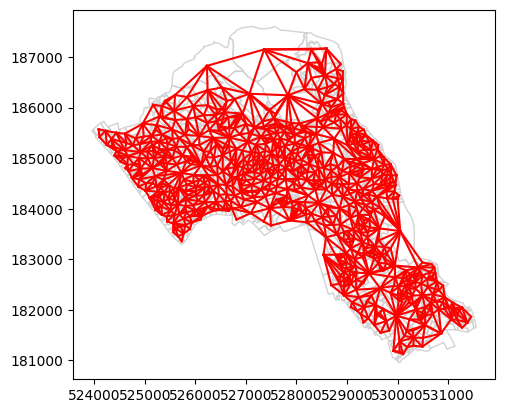

In [69]:
from libpysal.weights import Queen

# Membuat daftar tetangga (neighbors) dengan skema Queen
wq = Queen.from_dataframe(OA_Census_sf)

# Plot GeoDataFrame OA.Census dengan border light grey
OA_Census_sf.plot(color='none', edgecolor='lightgrey')

# Menggambar garis merah antara objek geometri yang adalah tetangga
for idx in range(len(OA_Census_sf)):
    for neighbor_idx in wq.neighbors[idx]:
        if neighbor_idx > idx:  # Menghindari penggambaran ganda
            # Mendapatkan koordinat pusat objek geometri menggunakan centroid
            x1, y1 = OA_Census_sf.geometry.iloc[idx].centroid.xy
            x2, y2 = OA_Census_sf.geometry.iloc[neighbor_idx].centroid.xy
            plt.plot([x1[0], x2[0]], [y1[0], y2[0]], color='red')

# Menampilkan plot
plt.show()

#**Find rook neighbours**

In [70]:
from libpysal.weights import Rook  # Menggunakan Rook untuk skema yang bukan Queen

# Membuat daftar tetangga (neighbors) dengan skema Rook (bukan Queen)
wrook = Rook.from_dataframe(OA_Census_sf)

# Menampilkan daftar tetangga (neighbors)
neighbors2 = wrook.neighbors

In [71]:
from libpysal.weights import Rook
from tabulate import tabulate

# Membuat daftar tetangga (neighbors) dengan skema Rook (bukan Queen)
wrook = Rook.from_dataframe(OA_Census_sf)

# Mendapatkan statistik dari daftar tetangga
num_regions = len(OA_Census_sf)
num_nonzero_links = wrook.n
percentage_nonzero_weights = wrook.pct_nonzero
avg_num_links = num_nonzero_links / num_regions

# Menampilkan informasi dalam format yang diinginkan
info = [
    "## Neighbour list object:",
    f"## Number of regions: {num_regions}",
    f"## Number of nonzero links: {num_nonzero_links}",
    f"## Percentage nonzero weights: {percentage_nonzero_weights:.4f}",
    f"## Average number of links: {avg_num_links:.4f}"
]

# Menampilkan informasi
for line in info:
    print(line)


## Neighbour list object:
## Number of regions: 749
## Number of nonzero links: 749
## Percentage nonzero weights: 0.7444
## Average number of links: 1.0000


#**Plot rook neighbours**


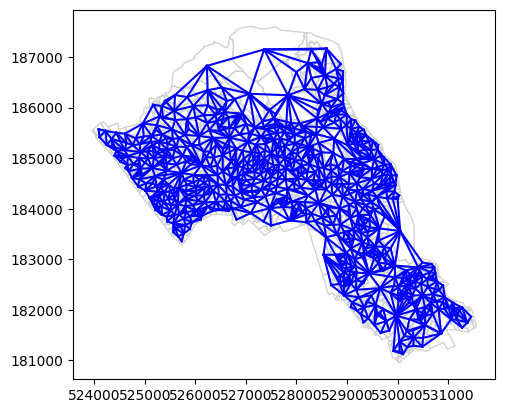

In [72]:
from libpysal.weights import Rook

# Membuat daftar tetangga (neighbors) dengan skema Queen
wrook = Queen.from_dataframe(OA_Census_sf)

# Plot GeoDataFrame OA.Census dengan border light grey
OA_Census_sf.plot(color='none', edgecolor='lightgrey')

# Menggambar garis merah antara objek geometri yang adalah tetangga
for idx in range(len(OA_Census_sf)):
    for neighbor_idx in wrook.neighbors[idx]:
        if neighbor_idx > idx:  # Menghindari penggambaran ganda
            # Mendapatkan koordinat pusat objek geometri menggunakan centroid
            x1, y1 = OA_Census_sf.geometry.iloc[idx].centroid.xy
            x2, y2 = OA_Census_sf.geometry.iloc[neighbor_idx].centroid.xy
            plt.plot([x1[0], x2[0]], [y1[0], y2[0]], color='blue')

# Menampilkan plot
plt.show()


#**Merge Rook and Queen Neighbors**

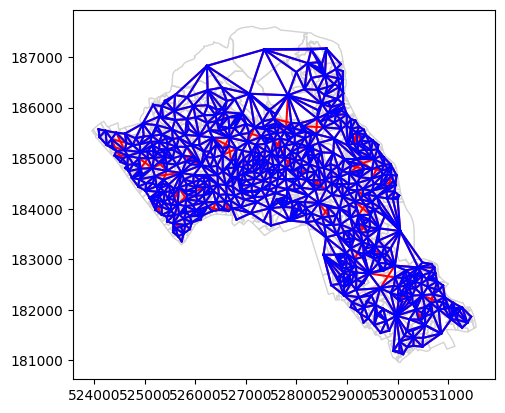

In [73]:
# Membuat daftar tetangga (neighbors) dengan skema Queen
wq = Queen.from_dataframe(OA_Census_sf)

# Membuat daftar tetangga (neighbors) dengan skema Rook (bukan Queen)
wrook = Rook.from_dataframe(OA_Census_sf)

# Plot GeoDataFrame OA.Census dengan border light grey
OA_Census_sf.plot(color='none', edgecolor='lightgrey')

# Plot tetangga (neighbors) dengan warna merah
for idx in range(len(OA_Census_sf)):
    for neighbor_idx in wq.neighbors[idx]:
        if neighbor_idx > idx:  # Menghindari penggambaran ganda
            # Mendapatkan koordinat pusat objek geometri menggunakan centroid
            x1, y1 = OA_Census_sf.geometry.iloc[idx].centroid.xy
            x2, y2 = OA_Census_sf.geometry.iloc[neighbor_idx].centroid.xy
            plt.plot(*zip(*[(x1[0], y1[0]), (x2[0], y2[0])]), color='red')

# Plot tetangga (neighbors) dengan warna biru
for idx in range(len(OA_Census_sf)):
    for neighbor_idx in wrook.neighbors[idx]:
        if neighbor_idx > idx:  # Menghindari penggambaran ganda
            # Mendapatkan koordinat pusat objek geometri menggunakan centroid
            x1, y1 = OA_Census_sf.geometry.iloc[idx].centroid.xy
            x2, y2 = OA_Census_sf.geometry.iloc[neighbor_idx].centroid.xy
            plt.plot(*zip(*[(x1[0], y1[0]), (x2[0], y2[0])]), color='blue')

# Menampilkan plot
plt.show()


In [74]:
from libpysal.weights import Rook

# Membuat daftar tetangga (neighbors) dengan skema Rook (bukan Queen)
wrook = Rook.from_dataframe(OA_Census_sf)

# Menghitung karakteristik list weights secara manual
num_regions = len(OA_Census_sf)
num_nonzero_links = wrook.n
percentage_nonzero_weights = num_nonzero_links / (num_regions * (num_regions - 1))  # Jumlah kemungkinan tetangga
avg_num_links = num_nonzero_links / num_regions

# Menampilkan informasi dalam format yang diinginkan
info = [
    "## Characteristics of weights list object:",
    f"## Neighbour list object:",
    f"## Number of regions: {num_regions}",
    f"## Number of nonzero links: {num_nonzero_links}",
    f"## Percentage nonzero weights: {percentage_nonzero_weights:.4f}",
    f"## Average number of links: {avg_num_links:.4f}"
]

# Menampilkan informasi
for line in info:
    print(line)


## Characteristics of weights list object:
## Neighbour list object:
## Number of regions: 749
## Number of nonzero links: 749
## Percentage nonzero weights: 0.0013
## Average number of links: 1.0000


#**Global Moran Test**

In [75]:
from libpysal.weights import Rook
from esda.moran import Moran

# Membuat daftar tetangga (neighbors) dengan skema Rook (bukan Queen)
wrook = Rook.from_dataframe(OA_Census_sf)

# Mengambil data kualifikasi (Qualification) sebagai array NumPy
qualification = OA_Census_sf['Qualification'].values

# Melakukan uji Moran global
moran = Moran(qualification, wrook)

# Menampilkan hasil uji Moran global
print("## Global Moran's I Test:")
print(f"## Moran's I: {moran.I:.4f}")
print(f"## Expected Moran's I: {moran.EI:.4f}")
print(f"## p-value: {moran.p_sim:.4f}")

## Global Moran's I Test:
## Moran's I: 0.5449
## Expected Moran's I: -0.0013
## p-value: 0.0010


#**Local spatial autocorrelation**

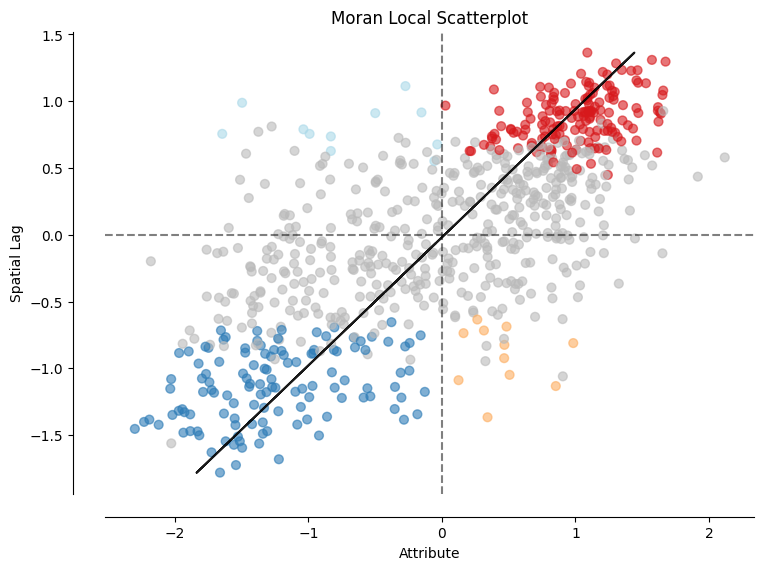

In [76]:
import geopandas as gpd
from libpysal.weights import Rook
from esda.moran import Moran_Local
from splot.esda import moran_scatterplot
import matplotlib.pyplot as plt

# Membuat daftar tetangga (neighbors) dengan skema Rook (bukan Queen)
wrook = Rook.from_dataframe(OA_Census_sf)

# Mengambil data kualifikasi (Qualification) sebagai array NumPy
qualification = OA_Census_sf['Qualification'].values

# Melakukan uji Moran lokal
moran_loc = Moran_Local(qualification, wrook)

# Menggambar Moran's Scatterplot
fig, ax = plt.subplots(1, figsize=(10, 6))
moran_scatterplot(moran_loc, p=0.05, ax=ax)
plt.show()


In [77]:
import geopandas as gpd
from libpysal.weights import Rook
from esda.moran import Moran_Local
import matplotlib.pyplot as plt

# Membuat daftar tetangga (neighbors) dengan skema Rook (bukan Queen)
wrook = Rook.from_dataframe(OA_Census_sf)

# Mengambil data kualifikasi (Qualification) sebagai array NumPy
qualification = OA_Census_sf['Qualification'].values

# Melakukan perhitungan Moran Local
moran_loc = Moran_Local(qualification, wrook)

# Hasil perhitungan Moran Local tersedia dalam atribut 'Is' (local Moran's I)
local_moran_i = moran_loc.Is

# Menampilkan hasil perhitungan Moran Local
print(local_moran_i)


[ 4.36406294e-02  5.67719194e-02 -1.35868016e-01  4.93217551e-01
  6.48477058e-01 -2.82470856e-01  3.92903757e-01  3.25508232e+00
  6.37254250e-01  1.00992236e+00  8.38154348e-01  1.88884207e-02
  2.60522764e+00 -2.93167739e-01 -4.99781401e-02 -2.56815421e-02
  2.64567540e-02 -2.00216355e-01 -7.94454308e-02 -3.94074979e-01
 -8.91037140e-02 -1.29167520e-02  1.55865173e+00  3.11077294e-01
  1.09339617e+00  8.67906180e-02  2.19190459e-01 -2.40517520e-01
  2.50061937e-01 -3.79830175e-02  2.87058450e-02  2.25041412e-01
 -1.33343792e-01 -3.03871878e-01  1.77074036e+00 -3.92282905e-01
  9.13851926e-01  2.08883954e-01  1.06237395e-01  3.46670066e-01
 -8.05457554e-04  4.20921202e-01  5.83385115e-02 -4.78332810e-01
  1.50654500e-01  4.98627413e-01 -8.10832513e-01  9.50589331e-01
  1.14348233e+00  3.33365947e-01  6.81032158e-01  1.64763288e-01
  1.17362840e+00  1.30872731e+00  1.57124946e+00  1.21696124e+00
  1.46774733e+00  3.26771814e-01  9.08634110e-01 -1.18120444e-01
  3.41668453e-01  1.16608

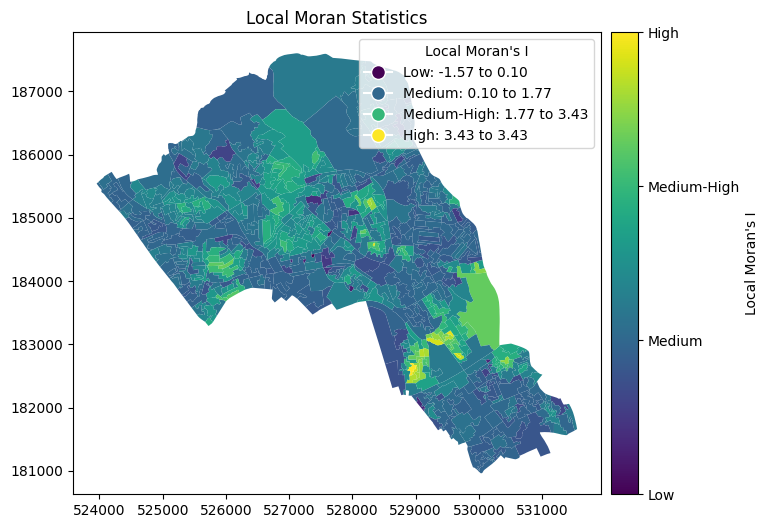

In [78]:
import geopandas as gpd
from libpysal.weights import Rook
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize
import numpy as np

# Membuat daftar tetangga (neighbors) dengan skema Rook (bukan Queen)
wrook = Rook.from_dataframe(OA_Census_sf)

# Mengambil data kualifikasi (Qualification) sebagai array NumPy
qualification = OA_Census_sf['Qualification'].values

# Melakukan perhitungan Moran Local
moran_loc = Moran_Local(qualification, wrook)

# Menambahkan hasil statistik Moran lokal ke dalam GeoDataFrame
OA_Census_sf['Local_Moran'] = moran_loc.Is

# Membuat peta dengan GeoDataFrame
fig, ax = plt.subplots(1, figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Menampilkan peta dengan legenda
vmin, vmax = moran_loc.Is.min(), moran_loc.Is.max()
norm = Normalize(vmin=vmin, vmax=vmax)
cbar = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
cbar.set_array([])

# Plot peta dan legenda
im = OA_Census_sf.plot(column='Local_Moran', cmap='viridis', linewidth=0.8, ax=ax, legend=False, cax=cax)
cbar = fig.colorbar(cbar, cax=cax, orientation='vertical', label="Local Moran's I")

# Mengatur batas nilai
bounds = np.linspace(vmin, vmax, 4)
cax.set_yticks(bounds)

# Menambahkan label untuk batas-batas nilai pada colorbar
cax.set_yticklabels(["Low", "Medium", "Medium-High", "High"])  # Sesuaikan dengan jumlah lokasi

# Menambahkan legenda di dalam grafik dengan angka dan rentang nilai
legend_labels = [f"Low: {vmin:.2f} to {bounds[1]:.2f}", f"Medium: {bounds[1]:.2f} to {bounds[2]:.2f}", f"Medium-High: {bounds[2]:.2f} to {bounds[3]:.2f}", f"High: {bounds[3]:.2f} to {vmax:.2f}"]
legend_colors = [plt.cm.viridis(norm(b)) for b in bounds]
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor=color, markersize=10) for label, color in zip(legend_labels, legend_colors)]
ax.legend(handles=legend_handles, title="Local Moran's I", loc='upper right', bbox_to_anchor=(1, 1))

ax.set_title("Local Moran Statistics")

plt.show()

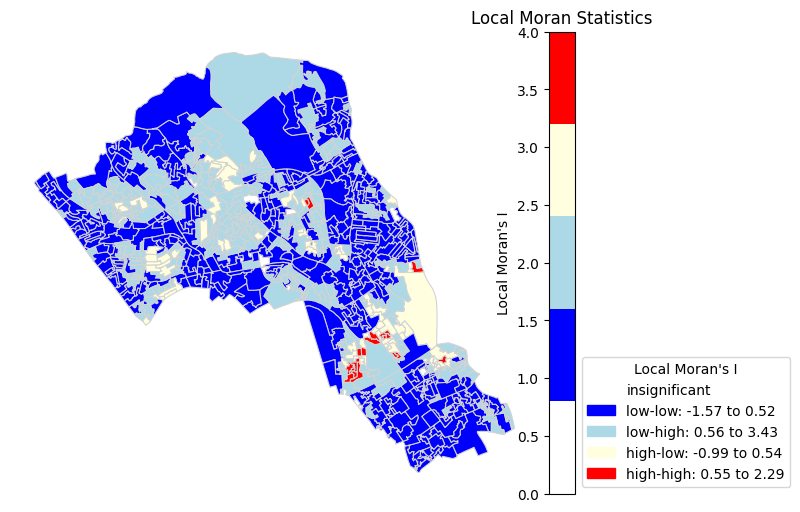

In [79]:
import numpy as np
import geopandas as gpd
from libpysal.weights import Rook
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches

# Membuat daftar tetangga (neighbors) dengan skema Rook (bukan Queen)
wrook = Rook.from_dataframe(OA_Census_sf)

# Mengambil data kualifikasi (Qualification) sebagai array NumPy
qualification = OA_Census_sf['Qualification'].values

# Melakukan perhitungan Moran Local
moran_loc = Moran_Local(qualification, wrook)

# Menambahkan hasil statistik Moran lokal ke dalam GeoDataFrame
OA_Census_sf['Local_Moran'] = moran_loc.Is

# centers the variable of interest around its mean
m_qualification = qualification - np.mean(qualification)

# centers the local Moran's around the mean
m_local = moran_loc.Is - np.mean(moran_loc.Is)

# significance threshold
signif = 0.1

# builds a data quadrant
quadrant = np.zeros(len(m_qualification), dtype=int)

quadrant[(m_qualification > 0) & (m_local > 0)] = 4
quadrant[(m_qualification < 0) & (m_local < 0)] = 1
quadrant[(m_qualification < 0) & (m_local > 0)] = 2
quadrant[(m_qualification > 0) & (m_local < 0)] = 3
quadrant[moran_loc.p_sim > signif] = 0

# Define colors for quadrants
cmap = ListedColormap(["white", "blue", "lightblue", "lightyellow", "red"])

# Plot map
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Membuat peta warna dummy sebagai referensi mappable
norm = plt.Normalize(vmin=0, vmax=4)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Menambahkan peta warna ke dalam axes
OA_Census_sf.plot(column='Local_Moran', cmap=cmap, linewidth=0.8, edgecolor='lightgray', ax=ax, legend=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

# Menyusun label legenda dengan nilai numerik
legend_labels = [
    f"insignificant",
    f"low-low: {np.min(moran_loc.Is[quadrant == 1]):.2f} to {np.max(moran_loc.Is[quadrant == 1]):.2f}",
    f"low-high: {np.min(moran_loc.Is[quadrant == 2]):.2f} to {np.max(moran_loc.Is[quadrant == 2]):.2f}",
    f"high-low: {np.min(moran_loc.Is[quadrant == 3]):.2f} to {np.max(moran_loc.Is[quadrant == 3]):.2f}",
    f"high-high: {np.min(moran_loc.Is[quadrant == 4]):.2f} to {np.max(moran_loc.Is[quadrant == 4]):.2f}"
]

# Menggunakan label lengkap untuk legenda di bawah peta
legend_labels_full = [
    f"insignificant",
    f"low-low: {np.min(moran_loc.Is[quadrant == 1]):.2f} to {np.max(moran_loc.Is[quadrant == 1]):.2f}",
    f"low-high: {np.min(moran_loc.Is[quadrant == 2]):.2f} to {np.max(moran_loc.Is[quadrant == 2]):.2f}",
    f"high-low: {np.min(moran_loc.Is[quadrant == 3]):.2f} to {np.max(moran_loc.Is[quadrant == 3]):.2f}",
    f"high-high: {np.min(moran_loc.Is[quadrant == 4]):.2f} to {np.max(moran_loc.Is[quadrant == 4]):.2f}"
]

# Menambahkan legenda ke dalam figure (pojok kiri bawah)
plt.legend(handles=[mpatches.Patch(color=cmap(i), label=label) for i, label in enumerate(legend_labels_full)], title="Local Moran's I", loc='lower left', bbox_to_anchor= (1.0, 0.0), ncol=1)

# Menambahkan colorbar
cbar = fig.colorbar(sm, cax=cax, orientation='vertical', location='left' ,label="Local Moran's I")

plt.title("Local Moran Statistics")
plt.show()


 #**Getis-Ord Gi statistic**

<ipython-input-139-623209144a4f>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', len(cutoffs) - 1)


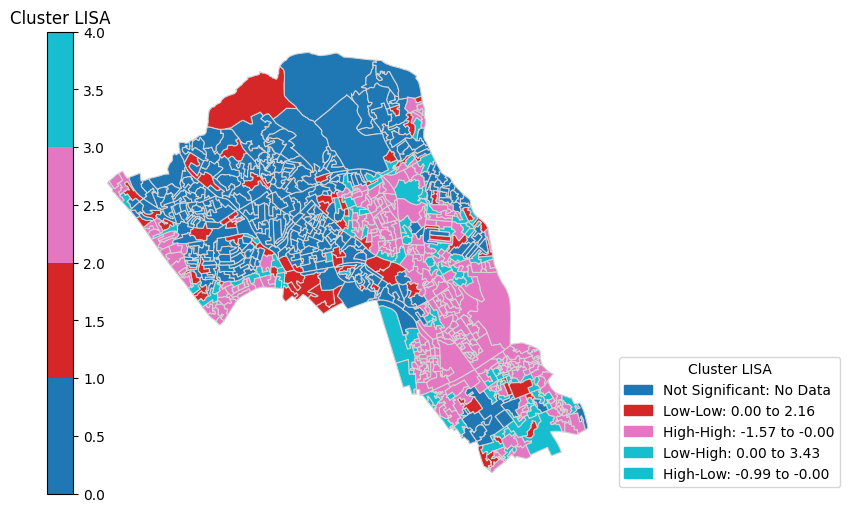

In [139]:
import geopandas as gpd
from libpysal.weights import Queen
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patches as mpatches
import numpy as np

# Membaca GeoDataFrame OA_Census_sf (pastikan Anda telah mengonversinya ke sf sebelumnya)
# Membuat daftar tetangga (neighbors) dengan skema Queen
wq = Queen.from_dataframe(OA_Census_sf)

# Mengambil data kualifikasi (Qualification) sebagai array NumPy
qualification = OA_Census_sf['Qualification'].values

# Melakukan perhitungan Local Moran's I
moran_loc = Moran_Local(qualification, wq)

# Mengatur label dan batas nilai numerik
labels = ['Not Significant', 'Low-Low', 'High-High', 'Low-High', 'High-Low']
cutoffs = [0, 1, 2, 3, 4]
cmap = plt.cm.get_cmap('tab10', len(cutoffs) - 1)

# Menampilkan peta Cluster LISA
fig, ax = plt.subplots(figsize=(10, 6))
divider = make_axes_locatable(ax)
cax = divider.append_axes("left", size="5%", pad=0.1)

# Menambahkan legenda berdasarkan rentang nilai numerik
legend_labels = []
for i, label in enumerate(labels):
    cluster_values = moran_loc.Is[moran_loc.q == i]
    if len(cluster_values) > 0:
        lower_bound = np.min(cluster_values)
        upper_bound = np.max(cluster_values)
        legend_labels.append(f"{label}: {lower_bound:.2f} to {upper_bound:.2f}")
    else:
        legend_labels.append(f"{label}: No Data")

# Menampilkan peta Cluster LISA dengan warna berdasarkan klaster
lisa = moran_loc.q
lisa_gdf = gpd.GeoDataFrame({'geometry': OA_Census_sf.geometry, 'Cluster_LISA': lisa})
lisa_gdf.plot(column='Cluster_LISA', cmap=cmap, linewidth=0.8, edgecolor='lightgray', ax=ax, legend=False)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)

# Menambahkan legenda ke dalam plot
ax.legend(handles=[mpatches.Patch(color=cmap(i), label=label) for i, label in enumerate(legend_labels)], title="Cluster LISA", loc='lower left', bbox_to_anchor= (1.0, 0.0), ncol=1)

# Menambahkan batas nilai numerik ke dalam colorbar
cax.set_yticks(cutoffs)
cax.set_yticklabels(legend_labels)

# Menambahkan colorbar vertikal
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=4))
sm._A = []
cbar = fig.colorbar(sm, cax=cax, orientation='vertical')

plt.title("Cluster LISA")
plt.show()
